In [1]:
import pandas as pd
from mplsoccer.pitch import Pitch

In [2]:
#read in csv
df = pd.read_csv('valladolidA.csv')

In [3]:
df

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,2248257153,1030,94,0.0,Barcelona,0.0,0.0,2,End,Successful,NaN,NaN,NaN
1674,2248257159,779,0,0.0,Valladolid,0.0,0.0,14,End,Successful,NaN,NaN,NaN
1675,2248257147,1031,0,0.0,Barcelona,0.0,0.0,14,End,Successful,NaN,NaN,NaN
1676,2248274127,1,0,0.0,Valladolid,0.0,0.0,16,FormationSet,Successful,NaN,NaN,NaN


In [4]:
#now we want to find our passes and recipients and then filter for only passes
df['passer'] = df['playerId']
df['recipient'] = df['playerId'].shift(-1)

#find passes and then only look for the successful passes
passes = df[df['type']=='Pass']
successful = passes[passes['outcome']=='Successful']

In [5]:
df.head(10)

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN,NaN,NaN
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN,NaN,9.0
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
7,2248226979,8,0,11.0,Barcelona,11.1,85.3,1,Pass,Unsuccessful,15.0,13.8,85.3,15.0,382939.0
8,2248226981,3,0,11.0,Valladolid,81.6,13.6,1,BlockedPass,Successful,382939.0,NaN,NaN,382939.0,1.0
9,2248227027,10,0,29.0,Barcelona,3.4,48.2,1,Pass,Successful,1.0,35.7,39.2,1.0,8.0


In [6]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,2248257023,768,93,25.0,Valladolid,9.9,84.5,2,Pass,Successful,121544.0,10.5,72.3,121544.0,279711.0
1659,2248257031,769,93,26.0,Valladolid,10.5,72.3,2,Pass,Successful,279711.0,14.7,88.7,279711.0,323135.0
1662,2248257045,772,93,44.0,Valladolid,21.7,100.0,2,Pass,Successful,121544.0,25.5,94.4,121544.0,108176.0
1663,2248257063,773,93,45.0,Valladolid,25.5,94.4,2,Pass,Successful,108176.0,15.6,97.2,108176.0,121544.0


In [7]:
#finding the first subsititution and filter the successful dataframe to be less than that minute
subs = df[df['type']=='SubstitutionOff']
subs = subs['minute']
firstSub = subs.min()

successful = successful[successful['minute'] < firstSub]

In [8]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,2248244927,346,44,40.0,Valladolid,46.3,29.0,1,Pass,Successful,365371.0,53.5,73.4,365371.0,279711.0
838,2248244931,347,44,43.0,Valladolid,53.7,77.0,1,Pass,Successful,279711.0,68.0,95.6,279711.0,121544.0
839,2248244955,348,44,44.0,Valladolid,68.0,95.6,1,Pass,Successful,121544.0,89.7,89.1,121544.0,141533.0
840,2248244977,349,44,48.0,Valladolid,88.6,90.5,1,Pass,Successful,141533.0,72.3,78.9,141533.0,279711.0


In [9]:
# making our passer and recipients are float values
pas = pd.to_numeric(successful['passer'],downcast='integer')
rec = pd.to_numeric(successful['recipient'],downcast='integer')
successful['passer'] = pas
successful['recipient'] = rec

C:\Users\Arnav\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Arnav\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
#now we need to find the average locations and counts of the passes
average_locations = successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']

In [11]:
average_locations

,x,y,count
passer,,,
1,7.964706,51.147059,17
2,68.500000,11.406897,29
4,33.222857,42.731429,35
8,51.948333,45.195000,60
9,64.025000,55.450000,4
10,64.757500,38.260000,40
15,37.311364,73.461364,44
16,67.212500,65.287500,24
18,53.783871,85.041935,31


In [12]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9,8
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8,21
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21,15
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15,1
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,2248244927,346,44,40.0,Valladolid,46.3,29.0,1,Pass,Successful,365371.0,53.5,73.4,365371,279711
838,2248244931,347,44,43.0,Valladolid,53.7,77.0,1,Pass,Successful,279711.0,68.0,95.6,279711,121544
839,2248244955,348,44,44.0,Valladolid,68.0,95.6,1,Pass,Successful,121544.0,89.7,89.1,121544,141533
840,2248244977,349,44,48.0,Valladolid,88.6,90.5,1,Pass,Successful,141533.0,72.3,78.9,141533,279711


In [13]:
#now we need to find the number of passes between each player
pass_between = successful.groupby(['passer','recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

#merge the average location dataframe. We need to merge on the passer first then the recipient
pass_between = pass_between.merge(average_locations, left_on='passer',right_index=True)
pass_between = pass_between.merge(average_locations, left_on='recipient',right_index=True,suffixes=['', '_end'])

In [14]:
pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,1,2,3,7.964706,51.147059,17,68.5,11.406897,29
24,8,2,6,51.948333,45.195000,60,68.5,11.406897,29
34,9,2,1,64.025000,55.450000,4,68.5,11.406897,29
38,10,2,5,64.757500,38.260000,40,68.5,11.406897,29
47,15,2,2,37.311364,73.461364,44,68.5,11.406897,29
...,...,...,...,...,...,...,...,...,...
94,106868,382939,2,45.359091,40.250000,22,45.6,39.420000,5
105,121734,382939,2,47.033333,8.558333,24,45.6,39.420000,5
138,369557,382939,2,50.750000,28.793750,16,45.6,39.420000,5
121,362276,91254,3,33.456250,67.825000,16,10.4,55.060000,5


In [15]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9,8
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8,21
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21,15
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15,1
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,2248244927,346,44,40.0,Valladolid,46.3,29.0,1,Pass,Successful,365371.0,53.5,73.4,365371,279711
838,2248244931,347,44,43.0,Valladolid,53.7,77.0,1,Pass,Successful,279711.0,68.0,95.6,279711,121544
839,2248244955,348,44,44.0,Valladolid,68.0,95.6,1,Pass,Successful,121544.0,89.7,89.1,121544,141533
840,2248244977,349,44,48.0,Valladolid,88.6,90.5,1,Pass,Successful,141533.0,72.3,78.9,141533,279711


In [17]:
#set minimum threshold of combinations.. I like 5 for high passing teams. 2 or 3 for low passing.
pass_between = pass_between[pass_between['pass_count']>5]
pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
24,8,2,6,51.948333,45.195000,60,68.500000,11.406897,29
77,28,2,7,50.152632,15.776316,38,68.500000,11.406897,29
39,10,8,11,64.757500,38.260000,40,51.948333,45.195000,60
64,18,8,6,53.783871,85.041935,31,51.948333,45.195000,60
70,21,8,11,55.221951,49.482927,41,51.948333,45.195000,60
79,28,8,9,50.152632,15.776316,38,51.948333,45.195000,60
18,4,15,15,33.222857,42.731429,35,37.311364,73.461364,44
72,21,15,6,55.221951,49.482927,41,37.311364,73.461364,44
66,18,16,9,53.783871,85.041935,31,67.212500,65.287500,24
51,15,18,12,37.311364,73.461364,44,53.783871,85.041935,31


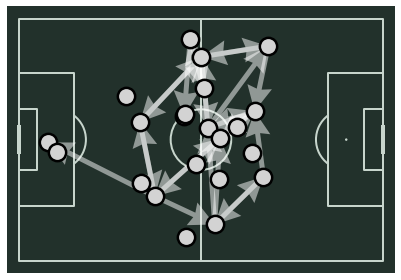

In [18]:
#plot the pitch

pitch = pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw()

#plot the arrows

arrows = pitch.arrows(1.2*pass_between.x,.8*pass_between.y,1.2*pass_between.x_end,.8*pass_between.y_end,
                     width = 5, headwidth = 5, color = 'w', ax = ax, zorder = 1, alpha = .5)

#plot the nodes

nodes = pitch.scatter(1.2*average_locations.x,.8*average_locations.y,
                     s = 300, color = '#d3d3d3', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1, ax=ax)